## import libraries

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


## load data

In [35]:
df=pd.read_csv(r"C:\DATASCIENCE\dataset\Titanic-Dataset.csv")

In [36]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [37]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## selecting appropriate column into the data frame


In [38]:
df=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]

In [39]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [40]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [41]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

## cleaning

In [42]:

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [43]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [44]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [45]:
print("Number of duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Number of duplicates after:", df.duplicated().sum())

Number of duplicates before: 111
Number of duplicates after: 0


In [46]:
df.shape

(780, 8)

In [47]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [48]:
dframe=df.copy()

 # one hot encoding

In [49]:
dframe=pd.get_dummies(df,columns=['Sex','Embarked'])

In [50]:
dframe.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1


In [51]:
dframe.shape

(780, 11)

## statistical analysis

In [52]:
dframe.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,2.246154,29.797600,0.525641,0.417949,34.829108,0.412821,0.374359,0.625641,0.198718,0.074359,0.726923
std,0.854452,13.708883,0.988046,0.838536,52.263440,0.492657,0.484267,0.484267,0.399291,0.262523,0.445826
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.750000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.699118,0.000000,0.000000,15.950000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,36.000000,1.000000,1.000000,34.375000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## correlation

In [53]:
cm=dframe.corr()

In [54]:
print(cm)

              Pclass       Age     SibSp     Parch      Fare  Survived  \
Pclass      1.000000 -0.338528  0.086788  0.038975 -0.552440 -0.336244   
Age        -0.338528  1.000000 -0.280010 -0.186999  0.090555 -0.079192   
SibSp       0.086788 -0.280010  1.000000  0.380596  0.134127 -0.037597   
Parch       0.038975 -0.186999  0.380596  1.000000  0.191055  0.069669   
Fare       -0.552440  0.090555  0.134127  0.191055  1.000000  0.246669   
Survived   -0.336244 -0.079192 -0.037597  0.069669  0.246669  1.000000   
Sex_female -0.117507 -0.093546  0.097959  0.236962  0.169307  0.513615   
Sex_male    0.117507  0.093546 -0.097959 -0.236962 -0.169307 -0.513615   
Embarked_C -0.248909  0.038559 -0.063366 -0.022168  0.275371  0.169752   
Embarked_Q  0.210159 -0.018115 -0.002411 -0.065551 -0.109335 -0.039142   
Embarked_S  0.099177 -0.023867  0.058172  0.058454 -0.182246 -0.128985   

            Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
Pclass       -0.117507  0.117507   -0.24

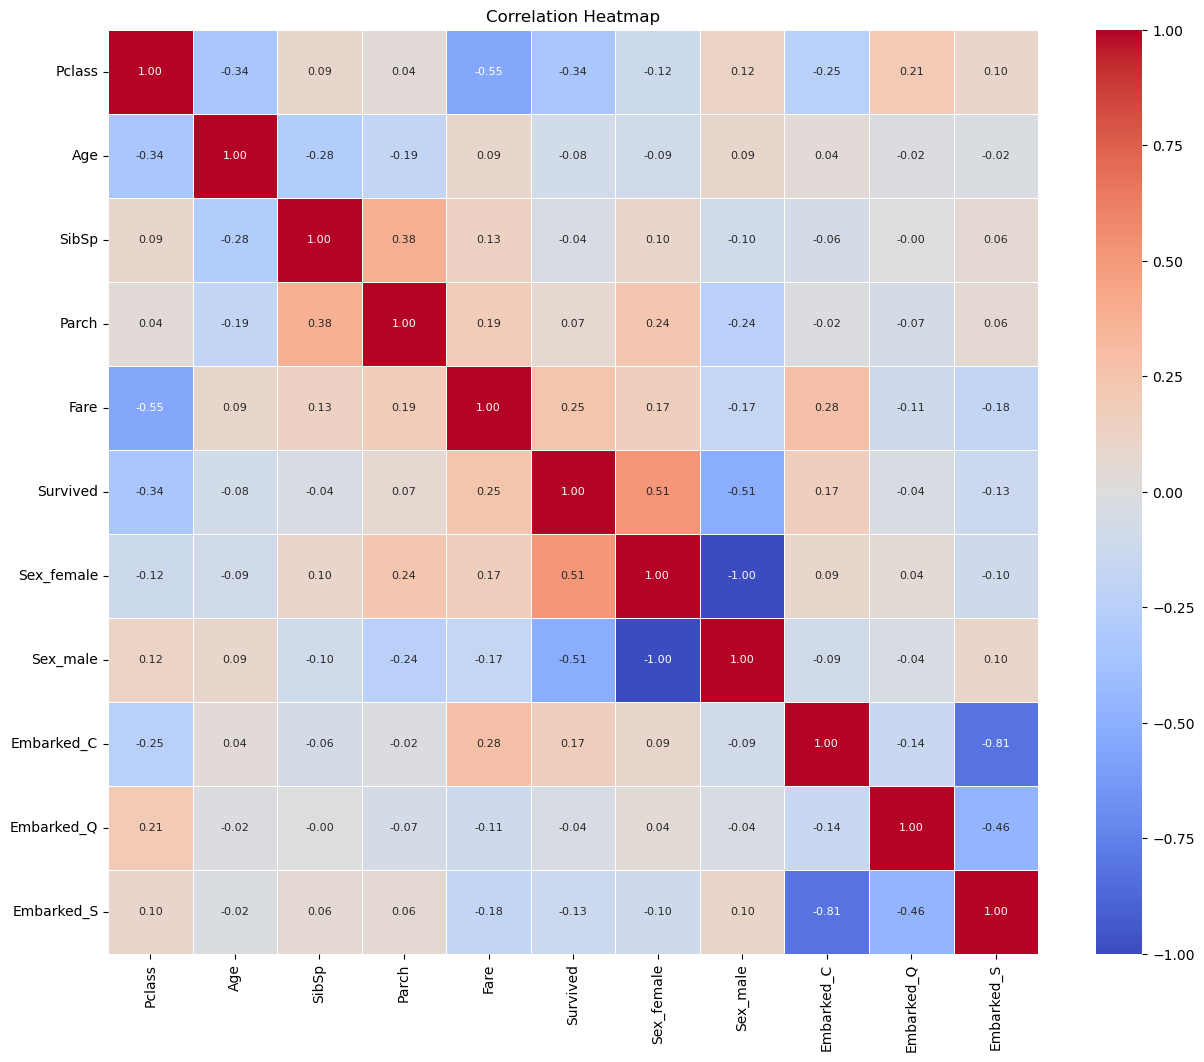

In [55]:
# Calculate the correlation matrix
corr_matrix = dframe.corr()

# Plot the correlation heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'fontsize': 8}, linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap')
plt.show()

In [56]:
dframe.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1


In [57]:
cols = dframe.columns.tolist()
cols.remove('Survived')
cols.append('Survived')
dframe = dframe.reindex(columns=cols)

In [58]:
dframe.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,22.0,1,0,7.2500,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,1,0,0,0,1,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1
4,3,35.0,0,0,8.0500,0,1,0,0,1,0


In [59]:
dframe.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived'],
      dtype='object')

In [60]:
# dframe.boxplot()

## checking for outliers

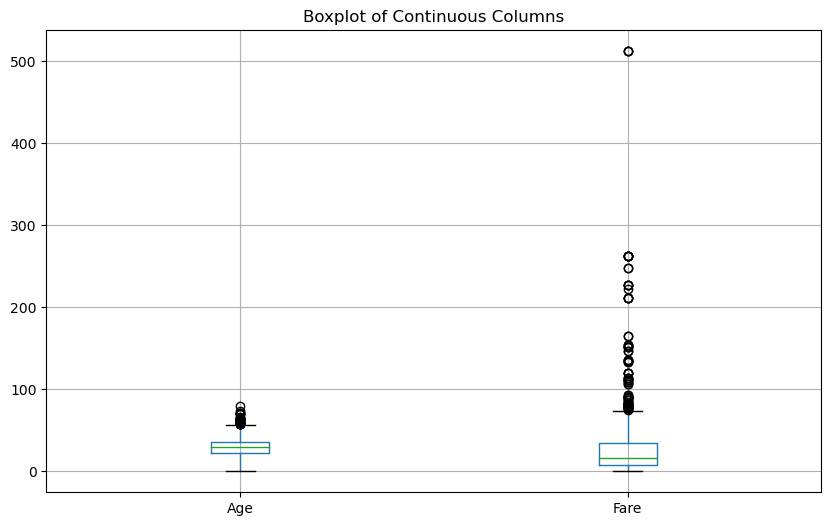

In [61]:
# Filter columns for continuous numerical data
columns_to_plot = ['Age', 'Fare']

# Plot boxplot for selected columns
dframe[columns_to_plot].boxplot(figsize=(10, 6))
plt.title('Boxplot of Continuous Columns')
plt.show()


## removing outliers

In [62]:
# Calculate IQR for each column
columns_to_analyze = ['Age', 'Fare']

for col in columns_to_analyze:
    Q1 = dframe[col].quantile(0.25)  # First quartile (25%)
    Q3 = dframe[col].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = dframe[(dframe[col] < lower_bound) | (dframe[col] > upper_bound)]
    
    dframe = dframe[(dframe[col] >= lower_bound) & (dframe[col] <= upper_bound)]
    
    print(f"Column: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    print(outliers[[col]])
    print('-' * 40)


Column: Age
Number of outliers: 32
      Age
11   58.0
33   66.0
54   65.0
94   59.0
96   71.0
116  70.5
170  61.0
195  58.0
232  59.0
252  62.0
268  58.0
275  63.0
280  65.0
326  61.0
366  60.0
438  64.0
456  65.0
483  63.0
487  58.0
493  71.0
545  64.0
570  62.0
587  60.0
625  61.0
630  80.0
659  58.0
672  70.0
684  60.0
694  60.0
745  70.0
829  62.0
851  74.0
----------------------------------------
Column: Fare
Number of outliers: 98
         Fare
1     71.2833
27   263.0000
31   146.5208
34    82.1708
52    76.7292
..        ...
820   93.5000
835   83.1583
849   89.1042
856  164.8667
879   83.1583

[98 rows x 1 columns]
----------------------------------------


## Logistic Regression Model with Standard Scaling

In [63]:
X=dframe.iloc[:,:-1]        #data is already loaded in dframe
y=dframe.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred=logreg.predict(X_test)


from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


accuracy=accuracy_score(y_test,y_pred)

print(f"Accuracy:{accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy:0.6384615384615384
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.93      0.76        82
           1       0.54      0.15      0.23        48

    accuracy                           0.64       130
   macro avg       0.59      0.54      0.50       130
weighted avg       0.61      0.64      0.57       130

Confusion Matrix:
[[76  6]
 [41  7]]


c:\Users\deepa\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## K-Nearest Neighbors (KNN) Classification Model

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X = dframe.iloc[:, :-1]
y = dframe.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.7692307692307693


## Gradient Boosting Classifier Model

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(X_train_scaled, y_train)
y_pred = gbc.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7923076923076923
